# House Loan Data Analysis

DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

In [1]:
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing    import LabelEncoder
from sklearn.impute           import SimpleImputer
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import accuracy_score 
from imblearn.over_sampling   import SMOTE
import matplotlib.pyplot as plt 
import matplotlib 
%matplotlib inline 

# ANN Modules
import keras
from keras.models      import Sequential
from keras.layers      import Dense, Dropout
from keras.optimizers  import adam

Using TensorFlow backend.


In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\loan_data (1).csv")
df= df.drop(['SK_ID_CURR'],axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df[pd.notnull(df['EMERGENCYSTATE_MODE'])]
#EMERGENCYSTATE_MODE--> this column contains around 145755 of missing values in it  

In [4]:
df.shape

(161756, 121)

In [5]:
df = df.loc[df['CODE_GENDER'] != 'XNA']

### Filling the missing value in label column

In [6]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(np.nan,'Other_C')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(np.nan,'Others')
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].replace(np.nan,'Others')
df['HOUSETYPE_MODE'] = df['HOUSETYPE_MODE'].replace(np.nan,'Unkown')
df['FONDKAPREMONT_MODE'] = df['FONDKAPREMONT_MODE'].replace(np.nan,'not available')

In [7]:
df = df[pd.notnull(df['AMT_REQ_CREDIT_BUREAU_YEAR'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141359 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 131.6+ MB


In [9]:
labels = df.describe(include=['object']).columns.values
labels

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

### Lable encoding

In [10]:
le = LabelEncoder()
for lab in labels:
    le.fit(df[lab].values)
    df[lab] = le.transform(df[lab])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141359 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int32(16), int64(40)
memory usage: 122.9 MB


### Imputing the missing values 

In [11]:
null_column = df.columns[df.isnull().any()]
print('Percentage of nan values :       %')
print()
print(df[null_column].isnull().sum()/df.shape[0]*100)

Percentage of nan values :       %

AMT_ANNUITY                      0.003537
AMT_GOODS_PRICE                  0.076401
OWN_CAR_AGE                     66.835504
CNT_FAM_MEMBERS                  0.000707
EXT_SOURCE_1                    53.918746
EXT_SOURCE_2                     0.181099
EXT_SOURCE_3                     7.437093
APARTMENTS_AVG                   6.336349
BASEMENTAREA_AVG                21.041462
YEARS_BEGINEXPLUATATION_AVG      2.606130
YEARS_BUILD_AVG                 36.207104
COMMONAREA_AVG                  42.638955
ELEVATORS_AVG                   11.141137
ENTRANCES_AVG                    5.554652
FLOORSMAX_AVG                    4.435515
FLOORSMIN_AVG                   38.816771
LANDAREA_AVG                    22.631739
LIVINGAPARTMENTS_AVG            39.747734
LIVINGAREA_AVG                   5.292199
NONLIVINGAPARTMENTS_AVG         41.785100
NONLIVINGAREA_AVG               14.723505
APARTMENTS_MODE                  6.336349
BASEMENTAREA_MODE               21.04146

In [12]:
df = df.drop(['EXT_SOURCE_1','OWN_CAR_AGE','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_AVG','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI'], axis=1)

#since these columns contains more tham 39% of nan values 

In [13]:
df.shape

(141359, 107)

In [14]:
df = df[pd.notnull(df['AMT_ANNUITY'])]

### Imputing the missing values

In [15]:
imp1 = SimpleImputer(missing_values= np.nan, strategy='mean')
imp2 = SimpleImputer(missing_values= np.nan, strategy='median')

In [16]:
df[['AMT_GOODS_PRICE','EXT_SOURCE_2',
    'EXT_SOURCE_3','APARTMENTS_AVG',
    'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG','ELEVATORS_AVG',
    'ENTRANCES_AVG','FLOORSMAX_AVG',
    'LANDAREA_AVG','LIVINGAREA_AVG',
    'NONLIVINGAREA_AVG','APARTMENTS_MODE',
    'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
    'FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE',
    'NONLIVINGAREA_MODE','APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI','BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
    'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI',
    'LANDAREA_MEDI','LIVINGAREA_MEDI',
    'NONLIVINGAREA_MEDI','TOTALAREA_MODE',]]             = imp1.fit_transform(df[['AMT_GOODS_PRICE','EXT_SOURCE_2',
                                                                                  'EXT_SOURCE_3','APARTMENTS_AVG',
                                                                                  'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                                                                                  'YEARS_BUILD_AVG','ELEVATORS_AVG',
                                                                                  'ENTRANCES_AVG','FLOORSMAX_AVG',
                                                                                  'LANDAREA_AVG','LIVINGAREA_AVG',
                                                                                  'NONLIVINGAREA_AVG','APARTMENTS_MODE',
                                                                                  'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                                                                                  'YEARS_BUILD_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
                                                                                  'FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE',
                                                                                  'NONLIVINGAREA_MODE','APARTMENTS_MEDI',
                                                                                  'BASEMENTAREA_MEDI','BASEMENTAREA_MEDI',
                                                                                  'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
                                                                                  'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI',
                                                                                  'LANDAREA_MEDI','LIVINGAREA_MEDI',
                                                                                  'NONLIVINGAREA_MEDI','TOTALAREA_MODE',]]  )

In [17]:
df[['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',]] = imp2.fit_transform(df[['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
                                                                                      'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                                                      'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',]])

In [18]:
null_columns=df.columns[df.isnull().any()]
print('Percentage of nan values :       %')
print()
print(df[null_columns].isnull().sum()/df.shape[0]*100)

Percentage of nan values :       %

Series([], dtype: float64)


### Finding column with zero variance 

In [19]:
var = df.var()[df.var()==0].index.values
print(var)

['FLAG_MOBIL' 'FLAG_DOCUMENT_2']


In [20]:
df = df.drop(['FLAG_DOCUMENT_2','FLAG_MOBIL'],axis=1)

#since this column contains only one categorical variable, ie zero variance

In [21]:
class_counts = df.TARGET.value_counts()

print('Counts of Class 0 :',class_counts[0])
print('Counts of Class 1 :',class_counts[1])
print()
print('Propotion ---> ',round(class_counts[0]/len(df.TARGET)*100),':',round(class_counts[1]/len(df.TARGET)*100))

Counts of Class 0 : 131840
Counts of Class 1 : 9514

Propotion --->  93.0 : 7.0


In [22]:
sc = StandardScaler()
df[['AMT_INCOME_TOTAL','AMT_ANNUITY',
   'AMT_CREDIT','AMT_GOODS_PRICE',
   'DAYS_BIRTH','DAYS_EMPLOYED',
   'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
   'DAYS_LAST_PHONE_CHANGE']]              = sc.fit_transform(df[['AMT_INCOME_TOTAL','AMT_ANNUITY',
                                                                  'AMT_CREDIT','AMT_GOODS_PRICE',
                                                                  'DAYS_BIRTH','DAYS_EMPLOYED',
                                                                  'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                                  'DAYS_LAST_PHONE_CHANGE']])

### Finding the highly correlated columns in dataset

In [23]:
corr = df.corr()

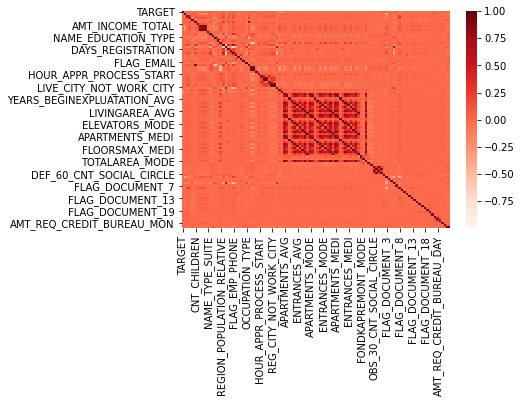

In [24]:
import seaborn as sns
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [25]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col]>0.90)]
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [26]:
df = df.drop(df[to_drop], axis=1)

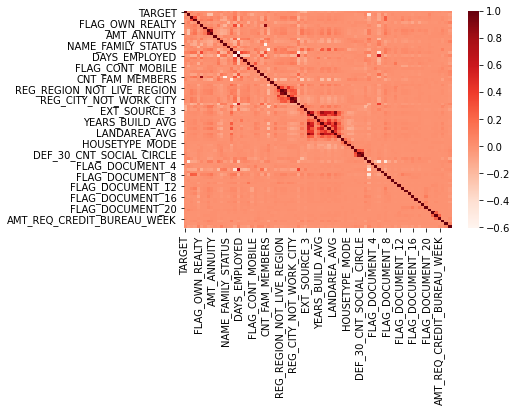

In [27]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

### Splitting data in Hold out method

In [28]:
x = df.drop('TARGET',axis=1)
y = df.TARGET

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.2, random_state= 10, stratify=y)
print(x_train.shape)
print(y_train.shape)
print()
print(y_train.value_counts())

(113083, 79)
(113083,)

0    105472
1      7611
Name: TARGET, dtype: int64


### Upsampling the minimum class

In [30]:
smt = SMOTE(random_state= 10, n_jobs=-1,sampling_strategy='all' )


#sampling_strategy='minority' ----> resample only the minority class;
#sampling_strategy='not minority' ----> resample all classes but the minority class;
#sampling_strategy='not majority' ----> resample all classes but the majority class;
#sampling_strategy='all' ----> resample all classes;
#sampling_strategy='auto' ----> equivalent to 'not majority'.

In [31]:
x_train, y_train = smt.fit_sample(x_train,y_train)

In [32]:
print(x_train.shape)
print(y_train.shape)

(210944, 79)
(210944,)


### Building NN model

In [33]:
model = Sequential()
model.add(Dense(units= 53,activation = 'relu',input_dim=79)) # first hidden and first input layer
model.add(Dropout(0.2))
model.add(Dense(units= 53,activation = 'relu')) # second hidden layer
model.add(Dropout(0.2))
model.add(Dense(units= 1,activation = 'sigmoid')) # output layer 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 53)                4240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 53)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 53)                2862      
_________________________________________________________________
dropout_2 (Dropout)          (None, 53)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 54        
Total params: 7,156
Trainable params: 7,156
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train,batch_size=10,epochs=20,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 210944 samples, validate on 28271 samples
Epoch 1/20
210944/210944 [==============================] - 35s 166us/step - loss: 0.6013 - accuracy: 0.6783 - val_loss: 0.5341 - val_accuracy: 0.7336
Epoch 2/20
210944/210944 [==============================] - 34s 159us/step - loss: 0.5522 - accuracy: 0.7223 - val_loss: 0.5880 - val_accuracy: 0.6809
Epoch 3/20
210944/210944 [==============================] - 34s 160us/step - loss: 0.5326 - accuracy: 0.7371 - val_loss: 0.5703 - val_accuracy: 0.6957
Epoch 4/20
210944/210944 [==============================] - 35s 165us/step - loss: 0.5174 - accuracy: 0.7465 - val_loss: 0.5327 - val_accuracy: 0.7197
Epoch 5/20
210944/210944 [==============================] - 34s 163us/step - loss: 0.5041 - accuracy: 0.7568 - val_loss: 0.6496 - val_accuracy: 0.6305
Epoch 6/20
210944/210944 [==============================] - 35s 167us/step - loss: 0.4940 - accuracy: 0.7640 - val_loss: 0.5328 - val_accuracy: 0.

In [36]:
score = model.evaluate(x_test,y_test)

28271/28271 [==============================] - 0s 15us/step


In [37]:
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.47075123753150794
Test accuracy :  0.7718156576156616


In [38]:
y_pred = model.predict_classes(x_test) #predcting the classes

In [39]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [40]:
y_test

130760    0
94751     0
55513     0
155355    0
208533    0
         ..
138720    0
64929     0
87179     0
83531     0
187548    0
Name: TARGET, Length: 28271, dtype: int64

### Calculating the accuracy score 

In [41]:
print('Accuracy of the model is : ',round(accuracy_score(y_pred, y_test)*100),'%')

Accuracy of the model is :  77.0 %
